In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [155]:
df = pd.read_csv('/content/crop_yield.csv')

In [156]:
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [157]:
df.shape

(19689, 10)

In [158]:
column_names = df.columns
column_names


Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield'],
      dtype='object')

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [160]:
df.isnull().sum()

,0
Crop,0
Crop_Year,0
Season,0
State,0
Area,0
Production,0
Annual_Rainfall,0
Fertilizer,0
Pesticide,0
Yield,0


In [161]:
df.duplicated().sum()

0

In [162]:
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


In [163]:
## There are some value in annunl rainfall is str so remove them

def isStr(obj):
    try:
        float(obj)
        return False
    except:
          return True



In [164]:
to_drop = df[df['Annual_Rainfall'].apply(isStr)].index

In [165]:
df = df.drop(to_drop)

# Visualization

**Graph Frequency vs State**

<Axes: xlabel='count', ylabel='State'>

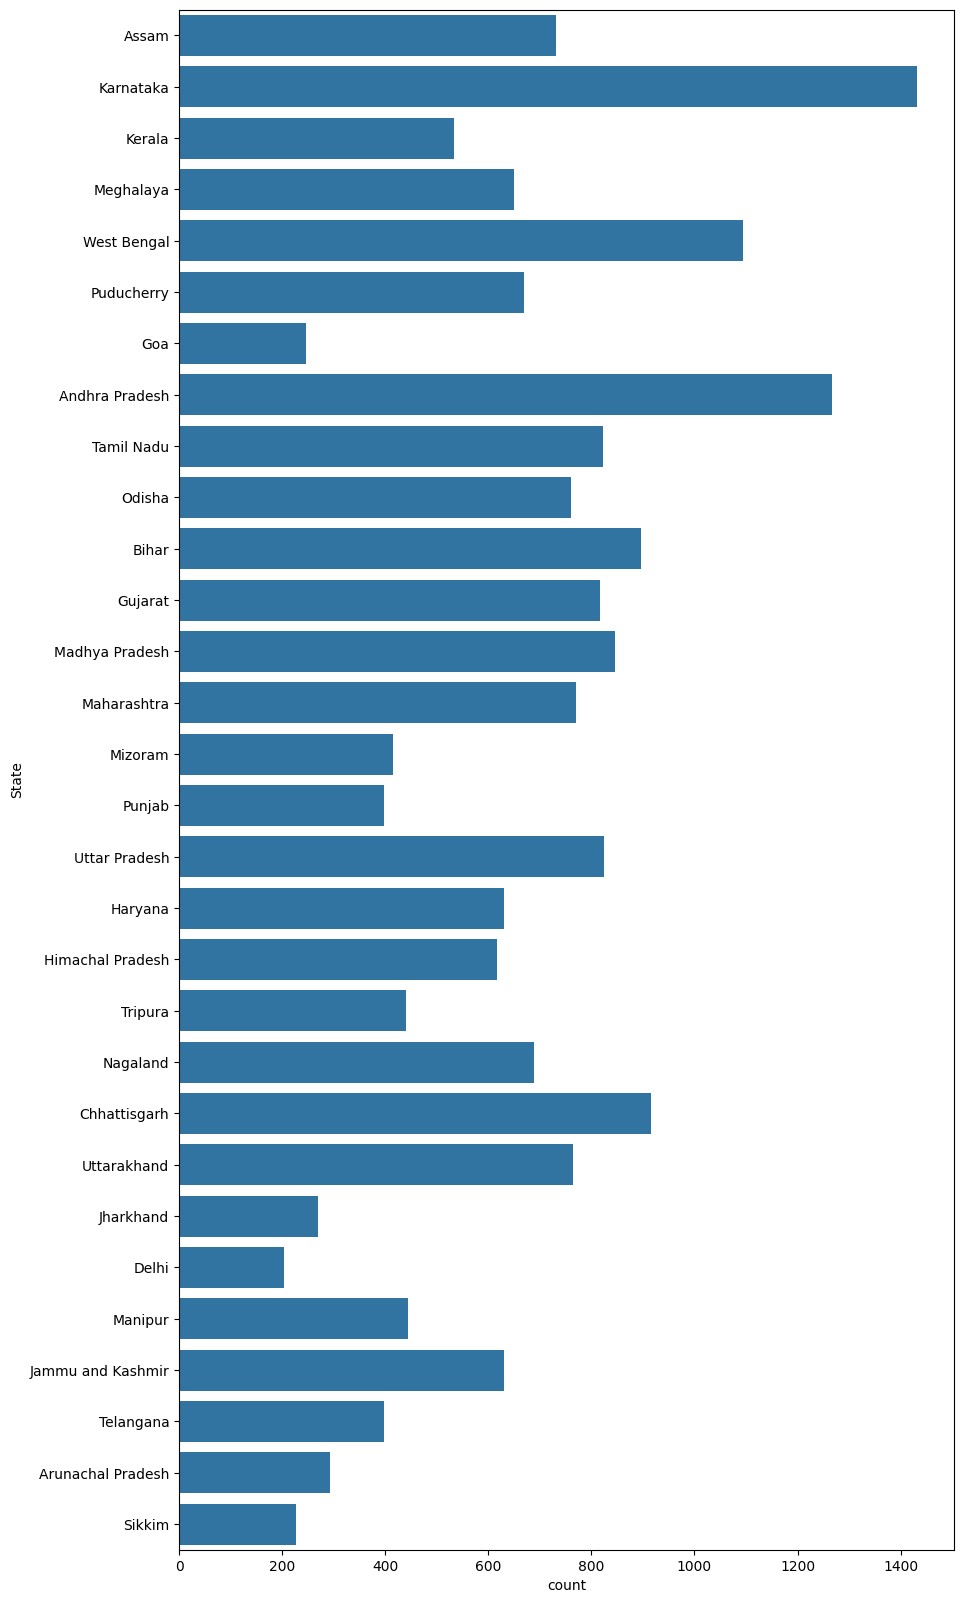

In [166]:
plt.figure(figsize=(10,20))
sns.countplot(y=df['State'])

**annual rainfall vs production analysis**

****

<function matplotlib.pyplot.show(close=None, block=None)>

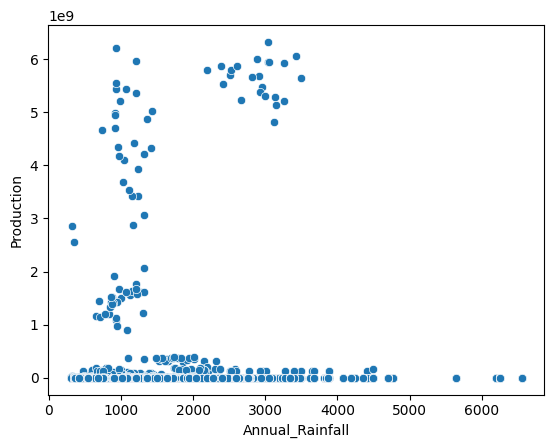

In [167]:
sns.scatterplot(x = df['Annual_Rainfall'], y = df['Production'])
plt.show

**Year wise analysis of agricultural production**

In [168]:
df_year = df[df['Crop_Year']!=2020]  # As the data of 2020 is incomplete

In [169]:
year_production = df_year.groupby('Crop_Year').sum()
year_production

,Crop,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
Crop_Year,,,,,,,,,
1997,ArecanutArhar/TurCastor seedCoconut Cotton(lin...,Whole Year Kharif Kharif Whole Year Kh...,AssamAssamAssamAssamAssamAssamAssamAssamAssamA...,1.660686e+08,6087009873,6.542691e+05,1.580475e+10,5.148126e+07,26187.756592
1998,ArecanutBajraBlack pepperCorianderCotton(lint)...,Kharif Kharif Kharif Kharif Su...,PuducherryPuducherryPuducherryPuducherryPuduch...,1.501238e+08,7868086697,1.138474e+06,1.483223e+10,4.353590e+07,36136.246483
1999,ArecanutArhar/TurBananaCastor seedCoconut Cott...,Whole Year Kharif Whole Year Kharif Wh...,AssamAssamAssamAssamAssamAssamAssamAssamAssamA...,1.470574e+08,8550025528,1.033857e+06,1.560720e+10,3.970550e+07,50013.419395
2000,ArecanutArhar/TurArhar/TurBajraBajraBananaCash...,Whole Year Kharif Rabi Kharif Ra...,Andhra PradeshAndhra PradeshAndhra PradeshAndh...,1.475277e+08,9562470060,1.119624e+06,1.448280e+10,3.835721e+07,58342.279827
2001,ArecanutArhar/TurArhar/TurBajraBajraBananaCash...,Whole Year Kharif Rabi Kharif Ra...,Andhra PradeshAndhra PradeshAndhra PradeshAndh...,1.456943e+08,9314563490,1.055077e+06,1.487976e+10,3.788053e+07,56581.195447
2002,ArecanutArhar/TurArhar/TurBajraBajraBananaCash...,Whole Year Kharif Rabi Kharif Ra...,Andhra PradeshAndhra PradeshAndhra PradeshAndh...,1.427858e+08,12409349456,1.040622e+06,1.351753e+10,3.569644e+07,65734.814831
2003,ArecanutArhar/TurArhar/TurBajraBajraBananaCash...,Whole Year Kharif Rabi Kharif Ra...,Andhra PradeshAndhra PradeshAndhra PradeshAndh...,1.496968e+08,12313711969,1.135610e+06,1.481699e+10,3.592724e+07,67039.368873
2004,ArecanutArhar/TurBajraBajraBajraBananaBlack pe...,Whole Year Kharif Kharif Rabi Su...,KarnatakaKarnatakaKarnatakaKarnatakaKarnatakaK...,1.480245e+08,13817065380,1.141189e+06,1.603697e+10,3.108514e+07,63905.917053
2005,ArecanutArhar/TurBajraBajraBananaCashewnutCast...,Whole Year Kharif Kharif Rabi Wh...,Andhra PradeshAndhra PradeshAndhra PradeshAndh...,1.479183e+08,14951210018,1.185828e+06,1.773836e+10,3.106285e+07,70140.586280


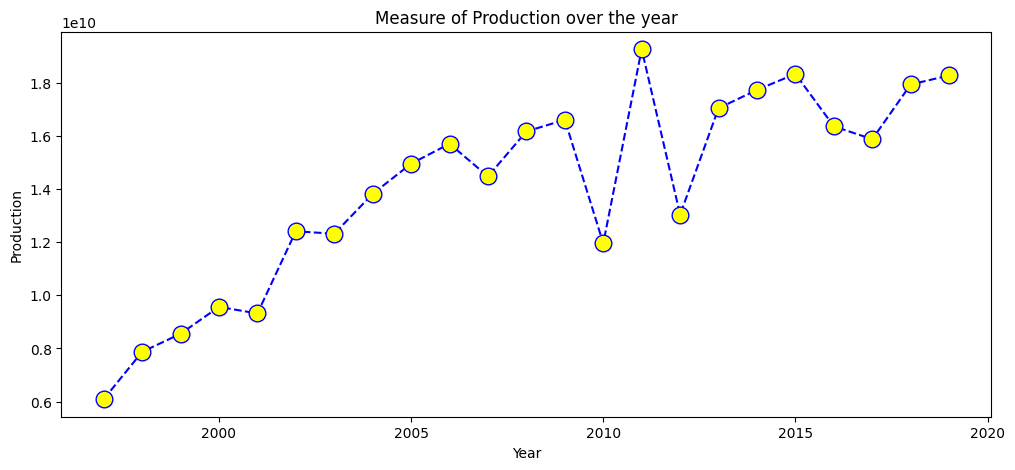

In [170]:
plt.figure(figsize = (12,5))
plt.plot(year_production.index, year_production['Production'],color='blue', linestyle='dashed', marker='o',
        markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Production')
plt.title('Measure of Production over the year')
plt.show()

*It can be observed that the yield has increased over the year, but after 2009 it is showing the declining trend. Reasons can be climate change, decrease in soil fertility but afther that it increase *

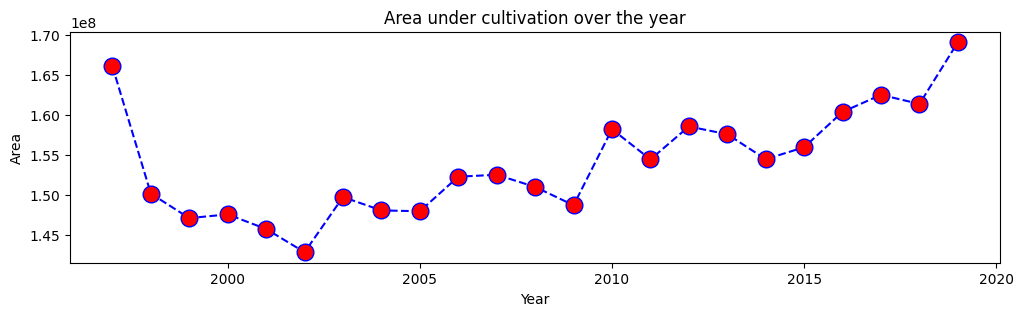

In [171]:
plt.figure(figsize = (12,3))
plt.plot(year_production.index, year_production['Area'],color='blue', linestyle='dashed', marker='o',
        markersize=12, markerfacecolor='red')
plt.xlabel('Year')
plt.ylabel('Area')
plt.title('Area under cultivation over the year')
plt.show()

*It can be observed that the area under cultivation has increased substantially. Either with the help of fertilizer and more irrigation fallow land is now under cultivation or area under forest is used for agriculture*

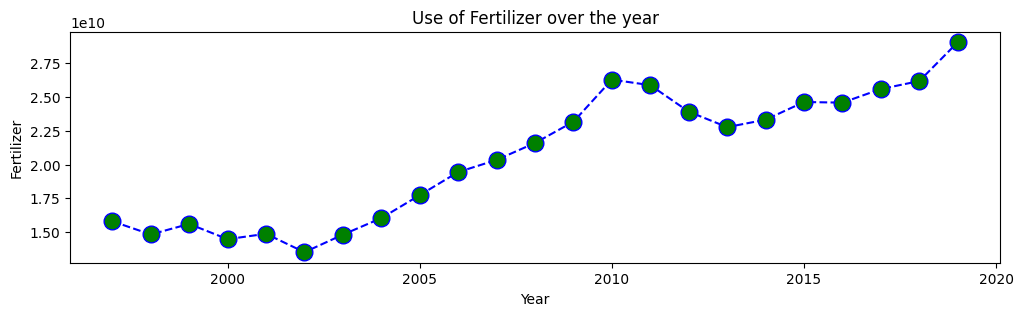

In [172]:
plt.figure(figsize = (12,3))
plt.plot(year_production.index, year_production['Fertilizer'],color='blue', linestyle='dashed', marker='o',
        markersize=12, markerfacecolor='green')
plt.xlabel('Year')
plt.ylabel('Fertilizer')
plt.title('Use of Fertilizer over the year')
plt.show()

*The use of Fertilizer in the fields is increasing*

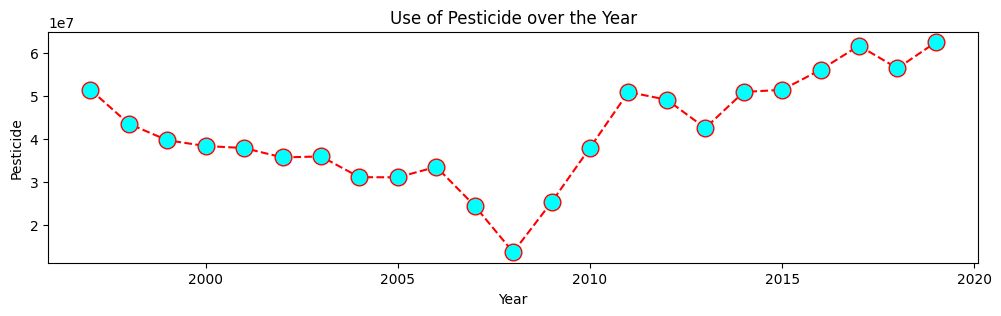

In [173]:
plt.figure(figsize = (12,3))
plt.plot(year_production.index, year_production['Pesticide'],color='red', linestyle='dashed', marker='o',
        markersize=12, markerfacecolor='cyan')
plt.xlabel('Year')
plt.ylabel('Pesticide')
plt.title('Use of Pesticide over the Year')
plt.show()

**State wise analysis of agricultural productione**

In [174]:
states = (df['State'].unique())

In [175]:
states

array(['Assam', 'Karnataka', 'Kerala', 'Meghalaya', 'West Bengal',
       'Puducherry', 'Goa', 'Andhra Pradesh', 'Tamil Nadu', 'Odisha',
       'Bihar', 'Gujarat', 'Madhya Pradesh', 'Maharashtra', 'Mizoram',
       'Punjab', 'Uttar Pradesh', 'Haryana', 'Himachal Pradesh',
       'Tripura', 'Nagaland', 'Chhattisgarh', 'Uttarakhand', 'Jharkhand',
       'Delhi', 'Manipur', 'Jammu and Kashmir', 'Telangana',
       'Arunachal Pradesh', 'Sikkim'], dtype=object)

In [176]:
states = df.groupby('State').sum()
states.sort_values(by = 'Production', inplace=True, ascending = False)
states

,Crop,Crop_Year,Season,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
State,,,,,,,,,
Kerala,ArecanutBlack pepperCashewnutCoconut TapiocaAr...,1072892,Whole Year Whole Year Whole Year Whole Year Wh...,3.639106e+07,129700649853,1.536641e+06,4.744603e+09,9.647595e+06,147710.353263
Tamil Nadu,ArecanutArhar/TurBajraBananaCashewnutCastor se...,1652030,Whole Year Kharif Kharif Whole Year Wh...,1.103728e+08,78051759253,7.654142e+05,1.473239e+10,2.956305e+07,185813.281648
Karnataka,ArecanutArhar/TurBajraBajraBlack pepperCardamo...,2876568,Whole Year Kharif Kharif Summer Kh...,2.579074e+08,63772797366,1.692393e+06,3.458024e+10,6.917312e+07,151391.867808
Andhra Pradesh,ArecanutArhar/TurArhar/TurBajraBajraBananaCash...,2543550,Whole Year Kharif Rabi Kharif Ra...,2.389253e+08,26076218605,1.160140e+06,3.125890e+10,6.210724e+07,229735.184723
West Bengal,ArecanutArhar/TurBajraBarleyCardamomCastor see...,2196856,Whole Year Whole Year Kharif Whole Year Wh...,2.376823e+08,8941179120,1.883456e+06,2.970480e+10,6.612665e+07,291986.752179
Uttar Pradesh,Arhar/TurBajraBarleyCastor seedGramGroundnutJo...,1657261,Kharif Kharif Rabi Kharif Ra...,5.426726e+08,4442585302,6.255756e+05,7.245282e+10,1.471335e+08,4168.818513
Assam,ArecanutArhar/TurCastor seedCoconut Cotton(lin...,1468138,Whole Year Kharif Kharif Whole Year Kh...,7.734260e+07,3637714928,1.531493e+06,1.029304e+10,2.093547e+07,160612.648362
Goa,ArecanutBananaBlack pepperCashewnutCoconut Gro...,494067,Whole Year Whole Year Whole Year Whole Year Wh...,2.749600e+06,2193998349,8.247461e+05,3.581078e+08,7.506114e+05,87275.955000
Maharashtra,Arhar/TurBajraCotton(lint)GramJowarJowarMaizeM...,1546539,Kharif Kharif Whole Year Kharif Kh...,4.619396e+08,1878564915,9.056708e+05,6.238907e+10,1.246885e+08,3388.793109


In [177]:
import plotly.express as px
states['Region'] = ['States' for i in range(len(states))]

fig = px.bar(states, x='Region', y = 'Yield', color=states.index, hover_data=['Yield'])
fig.show()

*From the above graph it can be observed that the yield of West Bengal is highest. Reason can be more annual rainfall, use of fertilizers*

**Production Vs Crop**

In [178]:
df['Crop'].value_counts()

,count
Crop,
Rice,1197
Maize,975
Moong(Green Gram),740
Urad,733
Groundnut,725
Sesamum,685
Potato,628
Sugarcane,605
Wheat,545


<Axes: xlabel='count', ylabel='Crop'>

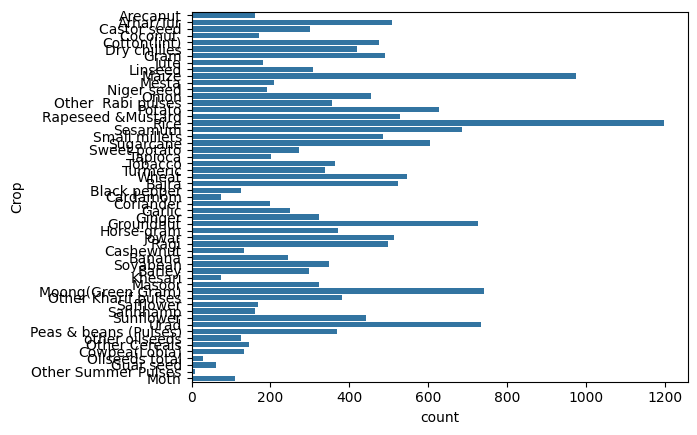

In [179]:
sns.countplot(y=df['Crop'])

In [180]:
crops = (df['Crop'].unique())

In [181]:
len(crops)

55

In [182]:
production_per_crop=[]
for item in crops:
    production_per_crop.append(df[df['Crop']==item]['Production'].sum())



In [183]:
production_per_crop

[39144261,
 60913833,
 24049211,
 308751970278,
 457831414,
 26009838,
 134316823,
 230423821,
 3187572,
 410911181,
 14052802,
 40641053,
 121700945,
 6437766,
 629688035,
 78148914,
 2229301180,
 13542969,
 13429255,
 7236536755,
 10409540,
 130884693,
 21083719,
 9688934,
 1810754504,
 118137047,
 2095650,
 255497,
 3242496,
 18798851,
 17681841,
 148626325,
 5276782,
 141915435,
 44215960,
 3737207,
 226471979,
 191659664,
 19498687,
 7115452,
 19724553,
 22490489,
 5246413,
 3241790,
 419887,
 14644638,
 35268564,
 14310509,
 10033173,
 1661859,
 732573,
 17535438,
 7227527,
 8394,
 913750]

**Train Test split Rearranging Columns**

In [184]:
## Fertilizer and Pesticide are showing the same corelation. Hence, have to drop one column to avoid Multicollinearity
col = ['Crop','Crop_Year','State', 'Area', 'Annual_Rainfall', 'Yield','Production']
df = df[col]

In [185]:
df.head(1)

,Crop,Crop_Year,State,Area,Annual_Rainfall,Yield,Production
0,Arecanut,1997,Assam,73814.0,2051.4,0.796087,56708


In [186]:
x = df.drop('Production',axis = 1)
y = df['Production']

In [187]:
from sklearn.model_selection import train_test_split

In [188]:
x_train, x_test ,y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [189]:
x_train

,Crop,Crop_Year,State,Area,Annual_Rainfall,Yield
19466,Groundnut,2011,Goa,357.0,3340.395455,2.860000
17802,Barley,2007,Delhi,75.0,677.500000,2.610000
7014,Moth,1999,Uttar Pradesh,204.0,883.400000,0.447273
14078,Barley,2014,Uttarakhand,21054.0,1287.400000,1.170769
8121,Cotton(lint),2002,Madhya Pradesh,552393.0,800.800000,0.535789
...,...,...,...,...,...,...
11284,Rice,2009,Uttar Pradesh,24695.0,585.800000,2.130000
11964,Maize,2010,West Bengal,17229.0,1096.000000,3.234545
5390,Onion,2017,Tamil Nadu,16518.0,970.900000,9.684074
860,Castor seed,2001,Karnataka,21799.0,1002.900000,0.704000


In [190]:
y_test

,Production
18238,1010
6918,10280
4894,44026
10960,27189
15615,4970
...,...
8087,535821
14720,9
9234,71469
19610,23981


**Converting Categorical to Numerical and Scaling the values**

In [191]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler , LabelEncoder

from sklearn.compose import ColumnTransformer


In [192]:
ohe = OneHotEncoder(drop = 'first')
scaler = StandardScaler()

In [193]:
preprocessor = ColumnTransformer(
transformers=[
    ('onehotencoder',ohe,[0,2]),
    ('standrization',scaler,[1,3,4,5])
],
remainder='passthrough'
)

In [194]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(drop='first'),
                                 [0, 2]),
                                ('standrization', StandardScaler(),
                                 [1, 3, 4, 5])])

In [195]:
x_train_dummy = preprocessor.fit_transform(x_train)
x_test_dummy = preprocessor.fit_transform(x_test)


In [196]:
x_train_dummy

<15751x87 sparse matrix of type '<class 'numpy.float64'>'
	with 93368 stored elements in Compressed Sparse Row format>

**Training Models**

In [197]:
from sklearn.linear_model import LinearRegression,Lasso,RidgeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [198]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

models = {
    'lr': LinearRegression(),
    'lss': Lasso(),
    'rg': Ridge(),  # Corrected to Ridge for regression
    'knr': KNeighborsRegressor(),
    'dtr': DecisionTreeRegressor()
}

for name, mod in models.items():
    mod.fit(x_train_dummy, y_train)
    y_pred = mod.predict(x_test_dummy)

    print(f"{name} MSE : {mean_squared_error(y_test, y_pred)} score: {r2_score(y_test, y_pred)}")


lr MSE : 4.7141748949907576e+16 score: 0.37991230895937633
lss MSE : 4.714170348139951e+16 score: 0.3799129070377847
rg MSE : 4.670198015658772e+16 score: 0.3856968889063611
knr MSE : 6344093375474470.0 score: 0.9165517974921931
dtr MSE : 627592617991265.5 score: 0.9917448447273803


**Select model**

In [199]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train_dummy, y_train)
dtr.predict(x_test_dummy)


array([7.00000e+00, 3.00000e+00, 9.00000e+00, ..., 1.32526e+05,
       3.49180e+04, 5.14000e+05])

**Predictive System**

In [200]:
def prediction():
  pass

In [201]:
def prediction(Crop, Crop_Year,State	, Area , Annual_Rainfall, Yield ):
    features = np.array([[Crop, Crop_Year, State	, Area , Annual_Rainfall, Yield ]])

    transformed_features = preprocessor.transform(features)
    predicted_value = dtr.predict(transformed_features).reshape(1,-1)
    return predicted_value[0]


In [202]:
df.sample()

,Crop,Crop_Year,State,Area,Annual_Rainfall,Yield,Production
15839,Sesamum,2017,Telangana,15236.0,815.7,0.576087,8672


In [203]:
Crop = 'Rice'
Crop_Year = 2015
State	 ='Karnataka'
Area = 977005.0
Annual_Rainfall =1024.9
Yield =2.525667

result = prediction(Crop , Crop_Year , State, Area , Annual_Rainfall, Yield)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [204]:
result

array([4424392.])

**Pickle Files**

In [205]:
import pickle
pickle.dump(dtr,open('dtr.pkl','wb'))
pickle.dump(preprocessor,open('preprocessor.pkl','wb'))